In [1]:
using Plots, LaTeXStrings, Optim, SpecialFunctions, Random,Distributions, Interpolations, Dierckx, NLopt, ForwardDiff, LinearAlgebra, Roots
gr();#Load packages

In [2]:
function Stochastic(LX,LY,t1,A0,PM,PP)  #Stochastic model
T=Int(t1)
Q=Int(sum(A0));
pos = [(0, 0) for _ in 1:Q]
pos0 = [(0, 0) for _ in 1:Q]
NumAgent= zeros(LX) 

count = 0
for i in 1:LX
    for j in 1:LY
        if A0[i,j] > 0
        count += 1
        pos0[count] = (i,j)
        pos[count] = (i,j)
        end
    end
end


for kk in 1:T
Q = length(pos)
count = 0

    while count < Q
        # Choose a random particle to move
        idx = rand(1:Q)
        count = count + 1
        xx, yy = pos[idx]

        # Choose a direction: 1=up, 2=down, 3=left, 4=right
        dir = rand(1:4)
        R=rand(1)
        if dir == 1 && yy < LY && yy >  1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy < LY && yy >  1 &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy < LY && yy >  1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy < LY && yy >  1 &&  R[1] <= PM
            xx += 1
        end

        if dir == 1 && yy == LY  &&  R[1] <= PM
            yy += 0
        elseif dir == 2 && yy == LY  &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy == LY  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy == LY  &&  R[1] <= PM
            xx += 1
        end

         if dir == 1 && yy ==1  &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy ==1  &&  R[1] <= PM
            yy -= 0
        elseif dir == 3 && yy ==1  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy ==1  &&  R[1] <= PM
            xx += 1
        end
        
        pos[idx] = (xx, yy)

    end

count = 0

    while count < Q
        # Choose a random particle to proliferate
        idx = rand(1:Q)
        count = count + 1
        xx, yy = pos[idx]

        R=rand(1)
        if R[1] <= PP
        push!(pos, (xx, yy))
        end
            
    end
end





for i in 1:Q
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1    
end

return NumAgent,pos0,pos
end

Stochastic (generic function with 1 method)

In [3]:
function loglhood(count,a)   #loglikelihood function 
σ = a[3]    
C(x)=LY*U0*exp(a[2]*T)*(erf((h-x)/sqrt(4*a[1]*T))+erf((h+x)/sqrt(4*a[1]*T)))/2;
dist=Normal(0,σ);
ℓ=0.0
for i in 1:LX
ℓ+=loglikelihood(dist,(count[i]-C(xxloc[i])))
end
return ℓ
end

loglhood (generic function with 1 method)

In [21]:
function Optimise(fun,θ₀,lb,ub) #NLopt routine
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_BOBYQA,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=1*200
    res = NLopt.optimize(opt,θ₀)
    return res[[2,1]]
end;

In [22]:
LX=200 #Stochastic simulation and surrogate problem definitions
LY=50
PM=1.0
PP=1/100
r=PP
D=PM/4
T=100.0
U0=0.5
h=25

A0=zeros(LX,LY)
xxloc=zeros(LX)
yyloc=zeros(LY)
for i in 1:LX
    xxloc[i]=-LX/2+(i-1)
    for j in 1:LY
    R=rand()
    yyloc[j]=0+(j-1)
        if abs(xxloc[i]) <= h && R[1] <= U0
        A0[i,j]=1.0
        end
    end
end
Q=Int(sum(A0));

  0.242404 seconds (710.33 k allocations: 40.359 MiB, 86.07% compilation time)


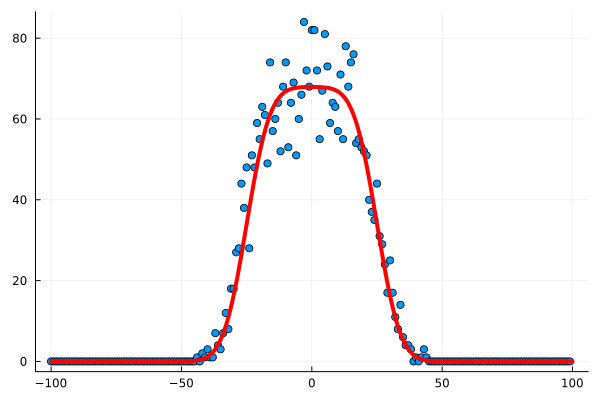

In [6]:
@time (data,pos0,pos)=Stochastic(LX,LY,T,A0,PM,PP); #Calls the stochastic model, data below is the output used for reproducibility
data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 3.0, 1.0, 1.0, 7.0, 4.0, 3.0, 7.0, 12.0, 8.0, 18.0, 18.0, 27.0, 28.0, 
    44.0, 38.0, 48.0, 28.0, 51.0, 48.0, 59.0, 55.0, 63.0, 61.0, 49.0, 74.0, 57.0, 60.0, 64.0, 52.0, 68.0, 74.0, 53.0, 64.0, 69.0, 
    51.0, 60.0, 66.0, 84.0, 72.0, 68.0, 82.0, 82.0, 72.0, 55.0, 67.0, 81.0, 73.0, 59.0, 64.0, 63.0, 57.0, 71.0, 55.0, 78.0, 68.0, 
    74.0, 76.0, 54.0, 55.0, 53.0, 52.0, 51.0, 40.0, 37.0, 35.0, 44.0, 31.0, 29.0, 24.0, 17.0, 25.0, 17.0, 11.0, 8.0, 14.0, 6.0, 4.0, 
    4.0, 3.0, 0.0, 1.0, 0.0, 1.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
pos = [(76, 4), (81, 1), (82, 6), (67, 14), (71, 7), (74, 15), (74, 10), (71, 16), (89, 10), (68, 27), (81, 12), (77, 11), (70, 24), (91, 26), (81, 22), (76, 42), (76, 38), (75, 35), (75, 36), (74, 39), (76, 46), (77, 36), (56, 45), (86, 45), (69, 4), (87, 4), (84, 10), (79, 9), (76, 21), (83, 22), (78, 23), (88, 22), (92, 26), (70, 35), (83, 17), (85, 30), (73, 35), (82, 33), (81, 36), (71, 36), (88, 48), (85, 36), (83, 50), (79, 48), (79, 48), (67, 48), (81, 49), (80, 14), (78, 12), (93, 5), (67, 4), (81, 6), (71, 24), (75, 19), (89, 9), (90, 33), (82, 9), (75, 17), (79, 18), (90, 15), (77, 32), (77, 15), (76, 33), (76, 27), (80, 44), (69, 24), (75, 35), (90, 31), (67, 49), (91, 44), (84, 34), (82, 4), (88, 12), (91, 1), (71, 18), (85, 20), (76, 20), (70, 23), (82, 28), (91, 15), (79, 25), (73, 12), (83, 25), (83, 39), (83, 20), (77, 41), (83, 32), (72, 48), (80, 46), (75, 49), (90, 46), (80, 47), (79, 45), (92, 3), (68, 7), (70, 17), (81, 14), (79, 3), (85, 13), (82, 19), (84, 15), (80, 4), (77, 19), (82, 27), (75, 20), (82, 23), (73, 20), (83, 18), (84, 14), (79, 40), (81, 29), (89, 31), (73, 23), (88, 27), (69, 35), (85, 25), (77, 41), (80, 42), (88, 45), (76, 42), (81, 9), (73, 9), (81, 17), (90, 14), (93, 9), (84, 23), (78, 12), (70, 15), (95, 33), (91, 29), (96, 21), (74, 31), (73, 36), (74, 39), (76, 32), (85, 37), (85, 37), (76, 45), (72, 45), (94, 49), (76, 43), (90, 43), (73, 4), (72, 12), (85, 3), (95, 6), (87, 7), (87, 11), (83, 11), (79, 18), (79, 17), (67, 14), (72, 22), (86, 29), (89, 30), (84, 24), (80, 29), (86, 24), (75, 36), (87, 43), (74, 43), (82, 43), (82, 48), (81, 48), (86, 5), (94, 1), (88, 13), (83, 8), (78, 14), (92, 15), (84, 17), (69, 12), (78, 10), (81, 31), (73, 22), (89, 22), (99, 19), (78, 34), (83, 36), (99, 25), (95, 38), (88, 34), (83, 36), (72, 49), (83, 41), (94, 40), (70, 47), (67, 4), (84, 9), (66, 11), (94, 6), (87, 4), (85, 6), (86, 6), (96, 16), (93, 14), (80, 9), (80, 22), (82, 15), (85, 16), (85, 34), (91, 20), (90, 30), (85, 40), (78, 25), (95, 27), (91, 35), (80, 41), (92, 29), (92, 43), (78, 40), (89, 35), (86, 47), (77, 42), (82, 38), (96, 50), (77, 48), (78, 45), (86, 3), (85, 3), (84, 1), (77, 1), (74, 2), (81, 7), (91, 8), (93, 1), (82, 17), (78, 17), (91, 24), (83, 23), (82, 33), (99, 24), (76, 28), (93, 36), (75, 30), (80, 34), (84, 36), (81, 48), (71, 45), (85, 31), (84, 49), (82, 10), (88, 2), (78, 12), (87, 8), (77, 9), (83, 13), (97, 11), (78, 17), (83, 10), (88, 13), (82, 24), (92, 22), (79, 3), (85, 28), (89, 21), (91, 31), (92, 21), (77, 25), (85, 40), (96, 23), (80, 26), (94, 22), (92, 36), (80, 30), (102, 42), (84, 43), (91, 32), (99, 38), (96, 47), (91, 44), (86, 1), (80, 28), (87, 1), (94, 3), (87, 7), (85, 22), (92, 25), (99, 18), (87, 19), (81, 18), (89, 15), (84, 16), (72, 15), (89, 29), (91, 18), (80, 38), (96, 28), (97, 49), (83, 35), (86, 45), (87, 22), (84, 37), (96, 39), (83, 45), (90, 43), (80, 48), (85, 4), (101, 5), (81, 1), (86, 5), (84, 1), (88, 6), (94, 19), (90, 26), (82, 19), (90, 21), (84, 25), (92, 37), (91, 31), (74, 38), (93, 35), (99, 33), (84, 35), (79, 40), (89, 39), (98, 50), (90, 50), (88, 45), (91, 42), (90, 43), (92, 10), (89, 6), (89, 4), (88, 2), (86, 18), (100, 11), (92, 3), (85, 23), (90, 18), (84, 16), (82, 30), (89, 25), (81, 32), (85, 31), (87, 24), (86, 38), (98, 42), (98, 26), (97, 40), (95, 42), (89, 44), (84, 31), (83, 50), (82, 49), (84, 9), (82, 14), (89, 7), (106, 11), (79, 7), (102, 21), (87, 9), (93, 18), (97, 17), (91, 21), (90, 30), (95, 24), (97, 30), (97, 19), (93, 23), (94, 40), (76, 38), (76, 40), (93, 40), (97, 29), (89, 30), (80, 41), (85, 32), (90, 46), (90, 40), (92, 47), (89, 45), (103, 7), (87, 3), (92, 5), (86, 6), (84, 1), (81, 9), (84, 17), (97, 34), (83, 7), (97, 27), (93, 28), (89, 26), (87, 49), (98, 27), (94, 42), (101, 30), (91, 43), (91, 28), (91, 45), (86, 46), (92, 43), (100, 40), (95, 18), (88, 13), (91, 7), (96, 4), (102, 9), (101, 11), (94, 11), (86, 25), (103, 22), (95, 9), (87, 24), (84, 28), (80, 28), (104, 33), (112, 26), (89, 29), (98, 39), (100, 28), (93, 50), (97, 41), (89, 2), (95, 1), (86, 16), (83, 2), (102, 21), (92, 18), (79, 20), (96, 14), (88, 29), (91, 11), (81, 29), (93, 32), (95, 25), (95, 21), (89, 33), (97, 42), (94, 39), (94, 49), (99, 49), (82, 44), (101, 50), (94, 7), (87, 25), (97, 8), (100, 8), (85, 22), (100, 12), (101, 7), (96, 21), (85, 25), (91, 17), (98, 37), (99, 17), (96, 28), (90, 36), (91, 26), (87, 44), (97, 32), (87, 40), (88, 37), (97, 39), (89, 48), (96, 38), (107, 46), (98, 46), (97, 12), (98, 13), (100, 2), (86, 11), (94, 6), (93, 18), (84, 24), (96, 23), (84, 27), (92, 30), (100, 34), (110, 28), (105, 45), (95, 35), (98, 37), (91, 45), (102, 41), (95, 40), (107, 43), (94, 37), (90, 41), (102, 46), (92, 1), (97, 11), (102, 2), (92, 14), (107, 6), (93, 30), (101, 23), (102, 20), (110, 7), (96, 24), (103, 36), (93, 23), (97, 35), (88, 31), (95, 38), (94, 37), (87, 33), (101, 30), (99, 48), (99, 49), (91, 48), (90, 8), (100, 9), (88, 13), (100, 10), (82, 20), (99, 16), (98, 24), (107, 13), (102, 43), (92, 23), (96, 28), (92, 41), (103, 24), (93, 39), (105, 24), (86, 47), (101, 42), (93, 36), (97, 32), (86, 45), (114, 45), (91, 46), (92, 8), (102, 14), (98, 5), (89, 1), (92, 17), (103, 15), (103, 25), (102, 8), (89, 14), (103, 17), (107, 15), (77, 20), (91, 28), (98, 28), (103, 21), (96, 27), (97, 37), (111, 31), (102, 36), (98, 40), (99, 37), (101, 37), (107, 39), (98, 40), (95, 46), (96, 47), (97, 44), (105, 39), (88, 47), (99, 1), (88, 16), (108, 3), (94, 2), (111, 6), (101, 7), (96, 25), (107, 8), (87, 11), (95, 21), (108, 25), (105, 25), (95, 19), (92, 22), (83, 26), (92, 37), (103, 19), (100, 38), (102, 20), (90, 26), (107, 42), (105, 17), (102, 43), (99, 37), (103, 45), (88, 42), (97, 47), (98, 45), (109, 39), (105, 44), (110, 44), (106, 44), (98, 5), (114, 5), (92, 9), (99, 3), (90, 10), (92, 2), (102, 19), (94, 15), (108, 19), (91, 9), (99, 25), (97, 15), (104, 21), (118, 27), (100, 24), (104, 26), (98, 22), (100, 36), (105, 50), (107, 31), (82, 47), (99, 48), (94, 35), (117, 45), (90, 40), (103, 38), (101, 35), (91, 1), (104, 15), (95, 18), (107, 6), (100, 32), (98, 15), (103, 11), (102, 19), (91, 27), (105, 33), (101, 37), (101, 26), (97, 16), (100, 37), (100, 43), (89, 44), (91, 35), (111, 34), (107, 50), (99, 48), (102, 49), (104, 12), (104, 2), (107, 5), (112, 11), (99, 4), (100, 6), (103, 4), (101, 14), (98, 4), (99, 15), (102, 4), (93, 14), (104, 11), (98, 10), (105, 18), (106, 27), (98, 34), (110, 31), (110, 24), (101, 26), (111, 33), (101, 27), (99, 35), (105, 38), (101, 33), (95, 45), (100, 43), (99, 39), (98, 39), (99, 4), (92, 5), (102, 9), (103, 15), (108, 3), (104, 14), (105, 2), (94, 18), (97, 28), (109, 1), (97, 11), (100, 27), (106, 10), (112, 23), (88, 42), (105, 29), (108, 24), (109, 19), (92, 35), (97, 32), (110, 22), (113, 40), (105, 49), (93, 48), (115, 41), (111, 45), (110, 46), (116, 8), (113, 11), (109, 3), (88, 2), (108, 9), (98, 13), (102, 22), (109, 18), (101, 14), (96, 18), (100, 18), (109, 29), (97, 23), (108, 33), (107, 31), (88, 41), (102, 43), (98, 38), (110, 37), (110, 44), (105, 47), (107, 42), (116, 4), (101, 15), (106, 16), (99, 13), (98, 2), (119, 13), (103, 16), (98, 13), (96, 11), (96, 15), (105, 21), (94, 25), (104, 24), (102, 23), (101, 29), (98, 18), (104, 23), (105, 45), (106, 47), (105, 33), (112, 27), (98, 35), (110, 50), (97, 49), (100, 49), (115, 47), (104, 35), (114, 35), (113, 39), (116, 37), (96, 48), (98, 11), (113, 8), (98, 2), (100, 23), (102, 16), (105, 8), (88, 10), (107, 20), (93, 7), (109, 31), (102, 20), (98, 21), (110, 24), (114, 21), (90, 11), (105, 39), (121, 24), (112, 27), (100, 31), (110, 43), (103, 31), (106, 35), (97, 40), (111, 37), (107, 42), (100, 45), (100, 47), (113, 12), (110, 6), (113, 20), (119, 15), (105, 12), (121, 26), (107, 30), (104, 19), (104, 32), (100, 26), (97, 26), (111, 41), (116, 31), (112, 50), (121, 41), (99, 43), (111, 41), (105, 45), (103, 45), (105, 36), (110, 45), (102, 15), (117, 1), (103, 9), (113, 6), (114, 16), (110, 4), (95, 3), (120, 13), (106, 31), (103, 15), (104, 16), (103, 21), (112, 15), (95, 16), (108, 31), (106, 35), (103, 23), (114, 39), (113, 28), (108, 33), (107, 28), (109, 23), (102, 28), (108, 31), (109, 37), (113, 49), (116, 41), (105, 44), (106, 50), (102, 43), (104, 6), (112, 4), (107, 1), (110, 4), (116, 12), (113, 1), (114, 11), (107, 19), (104, 12), (106, 10), (105, 23), (106, 25), (111, 27), (105, 29), (108, 26), (106, 42), (103, 30), (113, 33), (111, 42), (115, 34), (108, 34), (112, 40), (104, 46), (105, 49), (105, 36), (110, 49), (121, 48), (113, 39), (103, 4), (113, 1), (110, 6), (119, 6), (116, 1), (111, 4), (116, 2), (108, 8), (114, 12), (116, 12), (110, 18), (116, 15), (107, 22), (116, 14), (122, 17), (101, 19), (107, 20), (112, 20), (112, 14), (116, 22), (98, 44), (105, 38), (118, 48), (100, 39), (123, 47), (114, 42), (117, 3), (101, 3), (112, 5), (114, 4), (116, 19), (108, 8), (115, 30), (122, 13), (105, 14), (107, 17), (107, 20), (115, 25), (94, 19), (113, 29), (116, 27), (115, 23), (117, 37), (97, 36), (114, 29), (132, 48), (104, 39), (122, 47), (106, 7), (112, 2), (118, 5), (111, 9), (120, 6), (104, 3), (113, 4), (115, 14), (96, 16), (128, 28), (106, 15), (114, 19), (122, 16), (102, 15), (111, 23), (106, 18), (117, 24), (110, 31), (119, 23), (104, 41), (109, 36), (119, 33), (112, 43), (110, 41), (114, 37), (108, 47), (110, 47), (107, 50), (116, 11), (123, 3), (117, 2), (121, 7), (104, 4), (116, 26), (119, 15), (114, 13), (105, 2), (128, 18), (112, 7), (117, 36), (109, 18), (116, 27), (120, 36), (106, 24), (109, 50), (122, 44), (114, 38), (107, 42), (112, 49), (115, 49), (117, 42), (115, 20), (125, 4), (118, 11), (108, 12), (111, 23), (123, 8), (114, 13), (117, 24), (116, 19), (113, 29), (114, 26), (109, 23), (135, 32), (122, 29), (114, 27), (111, 37), (123, 29), (116, 38), (118, 42), (121, 32), (124, 48), (113, 43), (111, 47), (108, 41), (109, 49), (101, 8), (118, 7), (111, 4), (113, 27), (122, 16), (101, 31), (114, 26), (112, 33), (110, 32), (120, 32), (118, 26), (124, 37), (102, 34), (103, 27), (116, 31), (122, 34), (116, 49), (114, 44), (118, 48), (110, 40), (107, 48), (114, 47), (120, 45), (112, 3), (118, 4), (124, 1), (109, 1), (127, 3), (114, 4), (105, 8), (118, 6), (105, 20), (112, 4), (116, 14), (117, 2), (111, 35), (120, 16), (109, 39), (105, 37), (111, 20), (132, 21), (112, 33), (120, 27), (116, 47), (117, 37), (124, 31), (118, 33), (109, 37), (119, 39), (128, 47), (114, 49), (104, 50), (116, 49), (125, 10), (110, 21), (121, 1), (106, 19), (123, 1), (117, 18), (114, 6), (115, 2), (120, 4), (117, 28), (103, 22), (120, 15), (119, 30), (119, 19), (127, 28), (116, 41), (125, 25), (129, 30), (105, 41), (118, 40), (117, 49), (114, 39), (127, 44), (115, 40), (120, 48), (108, 39), (119, 1), (120, 13), (122, 8), (114, 15), (118, 5), (131, 13), (120, 28), (121, 21), (122, 18), (91, 36), (121, 36), (112, 29), (114, 23), (121, 34), (132, 26), (111, 34), (111, 35), (119, 36), (118, 37), (109, 48), (121, 35), (111, 44), (119, 45), (125, 46), (123, 48), (130, 50), (119, 12), (124, 1), (116, 7), (127, 10), (118, 1), (122, 4), (128, 7), (122, 16), (113, 15), (126, 12), (129, 17), (114, 9), (118, 15), (122, 15), (125, 11), (122, 33), (111, 23), (122, 25), (121, 18), (116, 40), (116, 40), (108, 41), (130, 45), (134, 46), (120, 48), (123, 40), (117, 46), (115, 48), (117, 47), (123, 1), (123, 3), (130, 10), (120, 4), (109, 2), (132, 10), (121, 21), (131, 8), (122, 12), (118, 20), (123, 20), (119, 31), (125, 17), (122, 29), (129, 27), (108, 36), (107, 36), (120, 24), (122, 31), (127, 21), (118, 39), (124, 41), (119, 35), (133, 47), (134, 47), (118, 41), (117, 46), (123, 50), (114, 48), (136, 1), (111, 3), (129, 5), (125, 4), (116, 8), (124, 13), (121, 7), (118, 11), (119, 14), (109, 11), (104, 14), (123, 18), (115, 18), (117, 20), (121, 23), (113, 39), (135, 21), (117, 30), (114, 18), (135, 31), (122, 49), (128, 44), (108, 26), (123, 41), (125, 46), (126, 41), (118, 50), (119, 9), (119, 5), (116, 10), (124, 4), (124, 1), (116, 10), (130, 24), (110, 12), (120, 18), (115, 27), (116, 15), (131, 16), (120, 20), (119, 21), (120, 23), (114, 43), (118, 35), (115, 39), (120, 31), (112, 24), (127, 45), (135, 36), (112, 31), (124, 45), (115, 49), (122, 45), (135, 50), (116, 49), (134, 45), (116, 4), (124, 2), (114, 9), (116, 14), (126, 13), (121, 9), (125, 9), (120, 17), (120, 21), (128, 18), (124, 31), (127, 13), (122, 32), (116, 23), (120, 31), (133, 30), (117, 34), (120, 35), (120, 35), (118, 41), (133, 42), (121, 38), (133, 41), (128, 25), (130, 40), (127, 43), (121, 49), (125, 50), (124, 45), (119, 50), (129, 1), (122, 10), (112, 16), (123, 5), (127, 9), (119, 12), (108, 21), (122, 22), (123, 20), (132, 11), (121, 33), (115, 31), (125, 38), (128, 26), (128, 35), (117, 34), (124, 36), (126, 33), (120, 50), (121, 40), (125, 50), (117, 48), (122, 23), (129, 1), (121, 4), (135, 3), (128, 22), (130, 6), (117, 8), (136, 10), (141, 10), (128, 10), (107, 17), (137, 23), (132, 27), (127, 33), (129, 31), (126, 26), (129, 31), (134, 43), (122, 34), (131, 28), (132, 48), (136, 33), (125, 43), (119, 44), (133, 13), (132, 9), (131, 15), (124, 6), (121, 3), (126, 4), (124, 11), (122, 20), (122, 8), (124, 5), (112, 26), (125, 27), (122, 15), (142, 34), (133, 24), (123, 39), (143, 38), (140, 32), (130, 38), (126, 50), (131, 49), (131, 46), (118, 36), (139, 44), (136, 49), (130, 44), (109, 4), (126, 46), (85, 33), (112, 5), (105, 25), (122, 35), (110, 15), (100, 27), (123, 6), (102, 4), (110, 32), (98, 48), (78, 28), (99, 46), (115, 7), (87, 42), (77, 12), (78, 7), (90, 36), (99, 24), (98, 30), (83, 20), (115, 23), (128, 42), (110, 43), (116, 49), (94, 49), (83, 30), (80, 40), (104, 50), (76, 13), (118, 8), (90, 19), (86, 40), (98, 10), (93, 11), (113, 1), (85, 48), (104, 36), (108, 46), (79, 17), (106, 31), (90, 12), (91, 29), (80, 8), (108, 42), (102, 43), (75, 26), (80, 16), (73, 46), (127, 43), (104, 41), (109, 50), (95, 6), (88, 40), (119, 1), (119, 45), (96, 26), (125, 18), (93, 45), (82, 32), (126, 22), (128, 19), (123, 12), (76, 44), (126, 45), (132, 45), (86, 48), (120, 22), (112, 14), (109, 42), (92, 41), (84, 3), (95, 11), (100, 28), (89, 16), (120, 39), (120, 2), (104, 11), (94, 37), (119, 10), (110, 29), (95, 8), (94, 1), (116, 27), (106, 40), (109, 42), (98, 17), (82, 46), (128, 37), (108, 21), (126, 8), (111, 34), (125, 34), (93, 35), (88, 14), (119, 17), (96, 11), (120, 29), (91, 34), (82, 12), (83, 16), (104, 43), (104, 15), (111, 36), (75, 41), (130, 27), (107, 44), (92, 43), (90, 47), (115, 10), (126, 10), (101, 33), (115, 30), (108, 42), (84, 12), (91, 48), (114, 44), (88, 30), (79, 1), (123, 20), (94, 49), (116, 35), (125, 17), (76, 13), (116, 13), (117, 29), (93, 3), (115, 33), (127, 29), (99, 9), (106, 26), (91, 13), (126, 45), (121, 16), (95, 50), (86, 31), (74, 1), (127, 4), (105, 34), (120, 30), (99, 42), (101, 33), (99, 38), (117, 2), (114, 27), (110, 1), (83, 29), (112, 33), (78, 21), (90, 27), (92, 12), (94, 41), (107, 31), (123, 48), (120, 31), (98, 7), (84, 46), (108, 20), (119, 13), (88, 36), (105, 20), (115, 13), (121, 14), (100, 48), (72, 34), (123, 10), (76, 14), (107, 26), (94, 13), (127, 14), (120, 27), (68, 5), (104, 48), (118, 16), (109, 14), (104, 13), (92, 40), (115, 45), (105, 36), (112, 23), (133, 42), (90, 15), (100, 48), (115, 18), (115, 34), (93, 3), (78, 49), (94, 46), (72, 37), (116, 32), (103, 10), (99, 9), (84, 13), (94, 36), (132, 16), (117, 20), (124, 6), (101, 19), (119, 21), (99, 44), (91, 20), (122, 25), (118, 11), (125, 43), (135, 1), (123, 10), (122, 10), (101, 32), (105, 39), (83, 24), (97, 40), (79, 27), (122, 39), (111, 12), (94, 34), (83, 39), (104, 8), (109, 7), (67, 43), (100, 7), (108, 12), (86, 21), (93, 34), (99, 21), (85, 11), (79, 7), (117, 21), (126, 37), (96, 21), (95, 25), (82, 7), (98, 5), (79, 22), (80, 27), (86, 46), (101, 13), (110, 16), (80, 9), (78, 23), (116, 32), (105, 4), (95, 34), (84, 8), (105, 4), (104, 23), (123, 27), (101, 26), (104, 18), (87, 32), (75, 50), (120, 1), (127, 21), (86, 29), (114, 28), (80, 15), (107, 22), (126, 31), (105, 25), (125, 34), (83, 29), (103, 4), (103, 23), (74, 13), (87, 17), (113, 49), (79, 42), (89, 25), (112, 45), (91, 20), (96, 19), (110, 40), (122, 28), (86, 5), (92, 19), (93, 3), (95, 6), (98, 17), (104, 37), (89, 43), (82, 45), (124, 38), (101, 8), (94, 26), (102, 48), (125, 46), (98, 27), (91, 24), (103, 9), (98, 30), (91, 43), (100, 15), (120, 31), (121, 20), (133, 11), (101, 15), (93, 36), (93, 49), (76, 7), (80, 6), (123, 22), (111, 1), (115, 33), (106, 6), (106, 43), (125, 30), (86, 48), (98, 10), (117, 7), (125, 33), (119, 44), (99, 37), (124, 6), (82, 34), (82, 27), (99, 43), (102, 45), (93, 23), (94, 45), (117, 36), (115, 22), (107, 7), (111, 46), (89, 41), (91, 18), (111, 40), (88, 40), (67, 1), (92, 42), (88, 35), (89, 22), (78, 17), (124, 7), (100, 41), (108, 14), (116, 30), (92, 34), (113, 45), (112, 19), (125, 47), (119, 19), (99, 36), (113, 40), (95, 26), (91, 13), (113, 4), (126, 13), (117, 16), (119, 37), (100, 6), (88, 35), (95, 4), (80, 30), (96, 48), (105, 3), (73, 1), (86, 21), (94, 17), (123, 46), (97, 42), (98, 11), (118, 27), (76, 35), (97, 23), (91, 19), (70, 21), (85, 44), (89, 16), (130, 12), (102, 40), (109, 23), (95, 30), (70, 13), (78, 13), (88, 31), (105, 17), (88, 30), (92, 16), (99, 38), (106, 32), (117, 17), (138, 33), (92, 23), (77, 20), (125, 7), (109, 29), (104, 25), (96, 47), (85, 18), (78, 46), (107, 24), (129, 46), (97, 22), (86, 30), (103, 47), (72, 12), (107, 43), (110, 32), (82, 17), (89, 38), (88, 15), (128, 40), (85, 45), (122, 4), (127, 3), (94, 35), (84, 11), (121, 13), (82, 50), (119, 40), (83, 31), (83, 32), (96, 12), (129, 22), (101, 16), (118, 40), (92, 21), (86, 32), (93, 11), (101, 40), (76, 17), (121, 46), (76, 49), (100, 33), (106, 22), (101, 13), (90, 36), (84, 25), (131, 1), (127, 14), (111, 26), (105, 49), (113, 3), (115, 6), (77, 30), (109, 9), (102, 46), (117, 34), (97, 45), (93, 24), (89, 24), (102, 50), (94, 47), (105, 30), (96, 41), (125, 36), (125, 25), (96, 16), (128, 11), (94, 19), (130, 46), (103, 22), (115, 7), (131, 37), (127, 20), (121, 42), (124, 40), (100, 8), (82, 35), (103, 16), (83, 24), (97, 35), (138, 36), (127, 28), (130, 25), (121, 8), (112, 44), (123, 20), (87, 27), (88, 32), (122, 17), (118, 30), (85, 36), (120, 6), (122, 22), (97, 42), (106, 41), (78, 36), (71, 12), (81, 3), (91, 47), (86, 49), (118, 24), (79, 35), (110, 4), (84, 24), (122, 31), (103, 31), (124, 18), (83, 31), (94, 30), (116, 28), (80, 8), (127, 19), (94, 35), (79, 40), (82, 41), (97, 32), (86, 43), (131, 40), (121, 22), (114, 14), (122, 16), (100, 31), (115, 38), (100, 3), (124, 15), (110, 13), (134, 1), (117, 33), (88, 49), (71, 16), (92, 2), (106, 26), (88, 21), (81, 42), (92, 3), (99, 46), (126, 46), (98, 34), (116, 2), (99, 7), (105, 3), (87, 45), (103, 8), (99, 5), (90, 49), (106, 48), (102, 11), (91, 20), (108, 21), (88, 1), (115, 47), (116, 12), (100, 43), (98, 19), (92, 3), (71, 30), (98, 11), (118, 36), (101, 6), (77, 40), (95, 9), (97, 35), (123, 28), (110, 9), (75, 32), (95, 32), (108, 23), (80, 8), (110, 1), (118, 23), (113, 3), (111, 33), (121, 18), (85, 19), (95, 44), (94, 4), (106, 38), (90, 21), (134, 16), (84, 43), (102, 3), (83, 45), (125, 41), (104, 12), (135, 50), (93, 5), (118, 5), (84, 12), (85, 48), (71, 20), (106, 29), (119, 38), (111, 33), (103, 50), (86, 1), (84, 6), (116, 33), (95, 21), (124, 45), (123, 16), (93, 50), (80, 49), (98, 30), (116, 47), (115, 9), (82, 48), (108, 34), (119, 34), (131, 17), (99, 22), (95, 4), (127, 46), (89, 10), (119, 4), (114, 21), (108, 5), (111, 13), (103, 9), (83, 48), (101, 7), (115, 15), (120, 4), (126, 9), (83, 18), (109, 38), (108, 45), (86, 9), (121, 4), (115, 18), (110, 50), (97, 39), (85, 8), (104, 40), (80, 28), (112, 27), (102, 1), (95, 23), (105, 38), (133, 43), (137, 43), (97, 10), (124, 39), (120, 29), (79, 48), (90, 9), (110, 17), (84, 30), (119, 11), (114, 22), (132, 40), (107, 21), (111, 6), (111, 15), (104, 4), (126, 42), (79, 6), (98, 1), (134, 17), (118, 24), (114, 31), (68, 28), (118, 5), (112, 21), (124, 33), (109, 41), (90, 41), (102, 5), (119, 42), (116, 4), (95, 42), (106, 32), (87, 2), (121, 12), (87, 34), (104, 41), (100, 22), (103, 10), (107, 8), (112, 11), (118, 1), (111, 30), (110, 16), (122, 11), (86, 31), (129, 49), (128, 36), (100, 20), (104, 49), (118, 30), (123, 31), (79, 40), (78, 43), (100, 36), (103, 39), (100, 36), (96, 21), (89, 5), (113, 49), (91, 42), (86, 6), (107, 24), (124, 41), (121, 22), (111, 50), (81, 1), (136, 45), (106, 15), (107, 10), (130, 39), (94, 47), (75, 21), (130, 25), (120, 38), (122, 7), (134, 36), (99, 40), (112, 19), (95, 26), (123, 12), (124, 41), (86, 23), (133, 47), (94, 16), (87, 45), (107, 9), (108, 6), (84, 5), (116, 11), (106, 32), (123, 20), (122, 22), (76, 40), (116, 9), (97, 23), (108, 46), (110, 46), (83, 41), (87, 28), (89, 17), (112, 17), (123, 39), (103, 38), (73, 31), (122, 3), (89, 5), (98, 22), (90, 20), (102, 41), (103, 18), (126, 12), (134, 23), (137, 20), (114, 4), (103, 31), (78, 34), (106, 16), (125, 32), (89, 35), (84, 9), (85, 4), (98, 14), (81, 36), (115, 4), (118, 45), (96, 40), (111, 25), (112, 18), (99, 25), (90, 33), (132, 37), (78, 24), (88, 31), (87, 18), (91, 5), (108, 27), (81, 46), (110, 3), (120, 38), (121, 15), (81, 11), (112, 2), (77, 6), (126, 30), (72, 40), (87, 26), (137, 24), (73, 13), (94, 29), (112, 19), (110, 29), (119, 3), (84, 25), (80, 29), (97, 19), (125, 12), (96, 30), (89, 11), (106, 44), (111, 16), (106, 13), (105, 30), (86, 48), (120, 18), (86, 14), (110, 45), (102, 24), (91, 47), (113, 26), (127, 37), (103, 9), (97, 36), (125, 3), (133, 24), (120, 33), (102, 15), (77, 48), (113, 31), (123, 28), (79, 46), (97, 31), (89, 9), (89, 22), (84, 32), (85, 16), (87, 32), (126, 41), (72, 7), (115, 8), (93, 14), (110, 41), (115, 32), (118, 15), (91, 27), (135, 34), (105, 38), (102, 22), (96, 42), (106, 42), (83, 37), (116, 6), (104, 15), (97, 9), (91, 34), (72, 39), (71, 7), (99, 16), (129, 40), (120, 1), (97, 49), (83, 50), (100, 25), (120, 8), (141, 33), (142, 1), (85, 13), (111, 47), (94, 27), (86, 50), (108, 42), (78, 25), (109, 11), (112, 43), (105, 3), (95, 19), (108, 15), (108, 42), (118, 22), (89, 33), (91, 12), (82, 50), (113, 48), (128, 8), (109, 50), (115, 33), (103, 41), (86, 7), (95, 2), (70, 45), (92, 50), (91, 33), (131, 34), (114, 20), (75, 33), (144, 6), (88, 17), (104, 29), (96, 2), (123, 9), (98, 24), (77, 43), (78, 3), (116, 33), (84, 50), (105, 13), (129, 2), (117, 40), (109, 8), (114, 38), (100, 42), (120, 2), (100, 48), (100, 43), (102, 47), (82, 41), (100, 2), (122, 16), (91, 27), (92, 37), (105, 22), (115, 43), (81, 15), (98, 44), (111, 13), (83, 27), (143, 30), (108, 46), (84, 16), (88, 47), (82, 10), (91, 42), (107, 32), (75, 3), (72, 5), (112, 30), (109, 23), (121, 17), (97, 43), (82, 19), (83, 48), (119, 39), (108, 7), (120, 11), (89, 5), (86, 48), (128, 40), (117, 47), (99, 30), (94, 33), (98, 24), (68, 5), (85, 8), (110, 25), (102, 34), (115, 27), (98, 25), (92, 1), (82, 13), (133, 43), (96, 37), (112, 39), (81, 35), (105, 28), (89, 33), (105, 25), (121, 43), (95, 48), (88, 36), (94, 25), (120, 34), (143, 7), (123, 11), (89, 10), (76, 20), (123, 29), (100, 42), (86, 43), (96, 30), (94, 29), (114, 12), (118, 29), (106, 11), (120, 18), (123, 48), (81, 18), (125, 41), (87, 12), (119, 5), (115, 30), (96, 1), (103, 4), (130, 23), (105, 18), (76, 23), (110, 28), (104, 36), (88, 19), (118, 19), (98, 38), (125, 26), (84, 15), (116, 9), (101, 9), (88, 29), (115, 40), (78, 13), (113, 9), (119, 34), (72, 19), (80, 2), (105, 34), (88, 3), (93, 20), (108, 17), (116, 44), (91, 41), (77, 36), (118, 50), (105, 35), (118, 30), (109, 38), (119, 22), (119, 20), (98, 3), (68, 49), (86, 3), (91, 7), (85, 12), (100, 45), (87, 23), (122, 31), (82, 14), (102, 17), (101, 26), (110, 39), (102, 43), (96, 39), (108, 18), (112, 43), (112, 13), (121, 43), (87, 22), (107, 25), (75, 42), (103, 32), (89, 5), (84, 43), (112, 45), (96, 20), (122, 34), (107, 19), (116, 22), (120, 23), (102, 34), (88, 25), (116, 20), (119, 50), (108, 32), (98, 26), (107, 47), (114, 21), (121, 7), (110, 10), (95, 6), (94, 12), (84, 27), (111, 21), (106, 2), (132, 23), (71, 35), (97, 42), (85, 28), (120, 17), (119, 16), (76, 17), (86, 7), (107, 2), (84, 49), (88, 14), (123, 24), (99, 6), (75, 33), (85, 25), (88, 50), (130, 22), (128, 42), (104, 9), (94, 22), (118, 15), (115, 13), (107, 32), (125, 22), (79, 32), (133, 18), (90, 36), (105, 35), (91, 23), (82, 20), (101, 45), (113, 37), (79, 8), (80, 49), (102, 2), (106, 6), (82, 9), (112, 20), (90, 27), (111, 25), (108, 27), (105, 21), (113, 36), (120, 19), (127, 4), (123, 38), (106, 33), (119, 16), (85, 19), (115, 39), (91, 41), (125, 39), (80, 13), (85, 48), (87, 40), (111, 35), (119, 33), (78, 49), (112, 40), (97, 16), (120, 38), (124, 45), (85, 15), (93, 5), (133, 39), (103, 1), (72, 32), (113, 8), (109, 46), (92, 6), (129, 36), (85, 25), (100, 8), (96, 15), (102, 2), (94, 3), (123, 27), (117, 34), (119, 49), (90, 40), (116, 31), (99, 47), (118, 29), (119, 11), (117, 39), (132, 11), (98, 47), (81, 26), (80, 40), (120, 43), (112, 35), (113, 21), (123, 24), (95, 15), (123, 21), (117, 25), (84, 46), (111, 2), (92, 35), (105, 3), (125, 17), (89, 39), (129, 13), (122, 43), (135, 30), (90, 22), (87, 34), (92, 26), (87, 50), (107, 14), (100, 16), (135, 46), (127, 31), (126, 23), (100, 20), (135, 6), (83, 29), (140, 44), (94, 31), (87, 26), (108, 15), (80, 50), (90, 40), (78, 10), (92, 6), (105, 15), (116, 14), (129, 32), (92, 43), (102, 21), (122, 37), (115, 50), (125, 22), (115, 49), (102, 44), (88, 21), (119, 18), (95, 50), (95, 50), (88, 17), (122, 47), (102, 47), (78, 28), (117, 8), (114, 49), (85, 32), (83, 10), (121, 6), (111, 30), (119, 9), (90, 40), (80, 28), (93, 42), (85, 6), (129, 7), (91, 28), (92, 31), (120, 13), (106, 13), (117, 4), (110, 26), (94, 45), (81, 35), (127, 8), (89, 49), (93, 2), (87, 40), (129, 27), (102, 42), (120, 18), (98, 42), (121, 12), (79, 35), (107, 21), (82, 45), (127, 18), (118, 22), (101, 39), (121, 32), (124, 20), (104, 17), (106, 7), (107, 8), (100, 4), (113, 47), (84, 23), (80, 14), (96, 14), (87, 33), (117, 4), (115, 40), (120, 26), (102, 24), (128, 32), (110, 19), (64, 30), (88, 18), (84, 8), (134, 39), (120, 4), (97, 10), (95, 4), (81, 7), (107, 35), (114, 24), (119, 39), (107, 36), (109, 24), (129, 33), (97, 29), (84, 2), (92, 39), (71, 20), (99, 9), (106, 32), (93, 32), (105, 6), (124, 30), (109, 11), (82, 7), (81, 4), (86, 29), (133, 48), (109, 36), (107, 21), (112, 45), (97, 35), (96, 9), (126, 42), (82, 15), (116, 20), (94, 40), (152, 50), (122, 34), (118, 21), (72, 31), (125, 11), (82, 14), (80, 34), (112, 11), (86, 8), (113, 6), (109, 22), (126, 22), (117, 22), (86, 29), (80, 32), (95, 26), (107, 4), (104, 29), (114, 24), (116, 9), (121, 22), (100, 19), (109, 25), (97, 14), (78, 19), (119, 45), (121, 36), (93, 8), (121, 28), (117, 40), (91, 31), (109, 37), (115, 17), (86, 50), (80, 13), (114, 4), (89, 8), (91, 23), (84, 46), (114, 19), (81, 39), (89, 45), (122, 28), (133, 14), (122, 29), (120, 32), (83, 28), (112, 9), (90, 13), (77, 47), (98, 16), (111, 30), (115, 26), (126, 5), (79, 9), (79, 35), (118, 3), (105, 9), (81, 22), (82, 14), (114, 3), (117, 30), (106, 44), (90, 31), (119, 47), (126, 47), (81, 4), (126, 21), (69, 43), (128, 45), (85, 25), (97, 50), (69, 16), (126, 11), (70, 11), (129, 17), (101, 37), (100, 41), (112, 40), (82, 50), (108, 36), (98, 4), (127, 48), (118, 4), (87, 12), (128, 14), (113, 19), (122, 36), (91, 39), (105, 41), (82, 13), (98, 31), (120, 26), (84, 30), (111, 1), (66, 12), (102, 49), (81, 31), (107, 46), (107, 42), (122, 27), (99, 41), (124, 18), (90, 32), (127, 40), (110, 21), (77, 8), (101, 41), (117, 28), (109, 24), (89, 32), (100, 31), (128, 34), (108, 2), (120, 12), (105, 33), (111, 40), (80, 32), (102, 48), (130, 21), (126, 12), (111, 6), (81, 25), (107, 7), (115, 36), (140, 10), (121, 29), (70, 30), (131, 32), (114, 37), (62, 50), (95, 36), (96, 22), (85, 15), (90, 13), (92, 42), (81, 18), (102, 2), (88, 9), (92, 17), (109, 35), (94, 20), (100, 25), (91, 8), (123, 12), (130, 1), (94, 18), (109, 49), (116, 45), (81, 22), (88, 7), (125, 35), (88, 28), (118, 31), (97, 37), (81, 32), (127, 49), (121, 12), (101, 30), (86, 29), (126, 25), (108, 14), (122, 9), (110, 8), (98, 5), (124, 42), (103, 21), (105, 18), (117, 46), (107, 25), (135, 12), (119, 1), (96, 14), (93, 47), (85, 4), (68, 45), (113, 8), (113, 14), (88, 33), (86, 30), (101, 41), (81, 7), (86, 10), (114, 47), (106, 28), (95, 21), (80, 49), (95, 5), (96, 13), (102, 34), (113, 48), (112, 34), (118, 1), (120, 17), (94, 40), (96, 14), (96, 33), (113, 48), (106, 23), (134, 9), (119, 4), (122, 20), (108, 35), (134, 5), (99, 10), (105, 11), (122, 9), (87, 15), (104, 28), (115, 11), (103, 5), (88, 25), (96, 1), (85, 43), (81, 22), (143, 32), (97, 6), (67, 27), (131, 17), (84, 33), (113, 39), (87, 6), (90, 3), (133, 33), (120, 16), (123, 32), (66, 49), (114, 19), (114, 39), (78, 22), (74, 10), (89, 40), (84, 17), (105, 2), (65, 11), (92, 32), (78, 13), (80, 39), (103, 7), (90, 26), (103, 19), (76, 31), (74, 50), (106, 18), (73, 3), (108, 15), (125, 3), (99, 9), (69, 38), (106, 17), (111, 20), (116, 14), (85, 30), (87, 22), (112, 28), (133, 50), (88, 38), (124, 43), (104, 19), (87, 45), (114, 30), (119, 50), (113, 29), (113, 13), (126, 45), (118, 17), (123, 4), (110, 39), (85, 25), (92, 24), (95, 33), (78, 39), (124, 6), (112, 49), (118, 9), (93, 32), (105, 32), (120, 50), (85, 12), (82, 40), (112, 5), (98, 16), (76, 21), (79, 41), (113, 13), (69, 30), (92, 38), (88, 44), (86, 11), (113, 21), (85, 34), (99, 19), (81, 20), (118, 47), (87, 17), (95, 32), (115, 21), (114, 45), (85, 47), (112, 36), (98, 43), (85, 29), (89, 7), (112, 23), (121, 34), (112, 41), (110, 36), (85, 20), (107, 3), (105, 11), (90, 44), (87, 48), (83, 19), (104, 24), (121, 41), (116, 33), (93, 27), (80, 1), (85, 43), (93, 34), (119, 28), (92, 21), (78, 11), (94, 16), (78, 34), (81, 29), (102, 38), (112, 50), (99, 20), (108, 18), (141, 1), (90, 29), (77, 19), (112, 38), (111, 44), (114, 23), (102, 47), (88, 36), (84, 42), (67, 23), (77, 48), (65, 34), (92, 49), (123, 34), (88, 49), (102, 38), (100, 37), (83, 9), (124, 30), (102, 7), (108, 44), (95, 13), (98, 8), (109, 17), (106, 20), (104, 14), (98, 43), (137, 34), (76, 46), (104, 35), (116, 30), (88, 3), (93, 21), (82, 36), (93, 13), (84, 23), (99, 10), (79, 47), (129, 8), (114, 5), (82, 32), (84, 14), (117, 5), (106, 23), (110, 42), (114, 30), (69, 15), (113, 14), (88, 33), (84, 2), (81, 47), (81, 37), (77, 48), (88, 26), (103, 17), (100, 44), (95, 45), (114, 13), (95, 24), (109, 16), (93, 30), (90, 12), (105, 45), (123, 44), (113, 15), (119, 11), (101, 11), (81, 28), (85, 31), (120, 39), (90, 7), (80, 19), (83, 2), (77, 39), (86, 22), (114, 41), (90, 37), (86, 33), (71, 33), (127, 18), (85, 7), (120, 10), (92, 19), (116, 34), (109, 39), (116, 47), (117, 15), (128, 5), (86, 30), (96, 42), (101, 8), (124, 24), (128, 39), (72, 5), (104, 28), (122, 43), (88, 23), (115, 29), (104, 45), (112, 37), (99, 1), (125, 18), (89, 11), (110, 43), (97, 10), (96, 2), (131, 33), (81, 4), (82, 33), (112, 28), (78, 10), (80, 35), (71, 40), (127, 5), (97, 31), (135, 43), (98, 39), (118, 34), (112, 50), (96, 50), (82, 31), (138, 17), (126, 14), (104, 27), (99, 40), (115, 1), (115, 37), (99, 38), (84, 23), (116, 9), (72, 5), (99, 24), (100, 47), (79, 14), (111, 24), (101, 24), (96, 36), (86, 28), (117, 34), (135, 40), (118, 10), (84, 11), (102, 17), (122, 16), (100, 44), (105, 45), (82, 41), (99, 42), (110, 29), (82, 44), (73, 27), (104, 10), (119, 43), (97, 49), (118, 29), (104, 29), (125, 30), (130, 33), (99, 9), (118, 12), (89, 32), (92, 4), (115, 35), (120, 26), (88, 8), (114, 13), (91, 28), (90, 43), (110, 12), (98, 8), (98, 34), (125, 35), (124, 19), (104, 8), (89, 30), (87, 15), (78, 16), (92, 3), (125, 31), (88, 26), (106, 15), (117, 7), (105, 25), (111, 27), (79, 8), (126, 5), (94, 44), (81, 9), (74, 17), (124, 22), (116, 10), (82, 16), (120, 28), (130, 17), (84, 4), (100, 44), (96, 42), (118, 48), (102, 38), (103, 46), (92, 44), (85, 14), (111, 22), (111, 23), (77, 15), (104, 48), (121, 27), (78, 39), (113, 29), (108, 32), (125, 25), (82, 20), (108, 40), (82, 35), (121, 31), (122, 37), (83, 18), (94, 49), (123, 8), (83, 41), (75, 40), (94, 25), (102, 5), (105, 6), (82, 5), (129, 13), (114, 1), (122, 31), (78, 43), (87, 22), (103, 8), (98, 32), (99, 29), (95, 43), (112, 22), (108, 30), (95, 38), (110, 35), (88, 30), (135, 32), (91, 3), (103, 5), (87, 13), (106, 1), (97, 40), (104, 48), (96, 12), (88, 18), (83, 48), (95, 35), (71, 29), (115, 31), (131, 50), (90, 39), (124, 19), (99, 23), (97, 28), (112, 16), (86, 34), (132, 33), (100, 22), (124, 45), (104, 35), (106, 28), (97, 48), (91, 5), (106, 46), (122, 42), (124, 30), (127, 11), (94, 41), (114, 5), (85, 19), (89, 4), (123, 48), (110, 7), (120, 41), (93, 4), (88, 20), (101, 20), (99, 29), (91, 44), (105, 37), (126, 29), (123, 11), (110, 50), (91, 28), (96, 31), (69, 19), (106, 27), (93, 21), (117, 32), (111, 33), (128, 8), (96, 23), (82, 12), (122, 24), (130, 31), (93, 38), (78, 18), (74, 19), (78, 28), (92, 20), (125, 8), (90, 32), (79, 44), (88, 44), (107, 48), (106, 11), (113, 13), (91, 7), (124, 42), (89, 23), (128, 8), (80, 18), (105, 41), (120, 30), (76, 22), (110, 45), (115, 33), (91, 38), (109, 26), (78, 13), (107, 21), (109, 25), (87, 10), (97, 30), (83, 24), (81, 24), (82, 18), (130, 9), (93, 20), (82, 23), (102, 10), (102, 35), (100, 19), (115, 42), (108, 34), (89, 29), (93, 13), (118, 42), (95, 45), (82, 1), (125, 46), (107, 16), (92, 45), (113, 17), (135, 19), (101, 7), (139, 3), (122, 17), (89, 24), (139, 31), (98, 23), (74, 35), (98, 34), (91, 50), (84, 34), (111, 39), (120, 8), (100, 33), (98, 8), (84, 15), (108, 9), (88, 10), (74, 12), (121, 36), (89, 20), (112, 38), (117, 33), (106, 41), (102, 40), (102, 35), (84, 17), (119, 41), (118, 39), (114, 37), (107, 38), (86, 34), (74, 17), (90, 14), (120, 5), (114, 30), (96, 26), (120, 34), (96, 33), (99, 3), (101, 31), (109, 1), (118, 30), (112, 39), (87, 12), (135, 50), (124, 17), (83, 39), (79, 50), (109, 31), (123, 38), (87, 18), (125, 32), (112, 18), (98, 10), (113, 37), (94, 14), (117, 4), (84, 4), (113, 25), (117, 29), (94, 10), (93, 50), (97, 48), (79, 19), (117, 4), (122, 32), (107, 10), (87, 15), (116, 50), (123, 22), (121, 2), (126, 4), (95, 22), (101, 19), (73, 1), (100, 36), (93, 2), (119, 42), (110, 12), (105, 27), (97, 14), (76, 17), (107, 43), (86, 18), (104, 11), (109, 23), (86, 6), (135, 50), (109, 44), (102, 30), (75, 15), (128, 47), (122, 48), (97, 42), (131, 13), (80, 50), (85, 28), (120, 36), (91, 37), (95, 12), (116, 31), (84, 17), (79, 11), (97, 19), (97, 3), (97, 2), (113, 36), (97, 39), (70, 29), (125, 27), (113, 21), (125, 11), (127, 25), (126, 11), (98, 40), (96, 48), (77, 27), (103, 8), (81, 30), (98, 8), (71, 29), (84, 18), (112, 43), (103, 3), (79, 11), (72, 45), (107, 14), (118, 9), (102, 11), (86, 42), (92, 33), (95, 3), (106, 12), (123, 12), (101, 39), (122, 35), (83, 14), (119, 27), (127, 7), (88, 34), (97, 42), (81, 18), (100, 8), (89, 11), (117, 5), (81, 35), (73, 27), (108, 25), (117, 30), (124, 30), (120, 26), (127, 10), (126, 41), (132, 40), (112, 11), (104, 27), (119, 14), (93, 14), (84, 4), (108, 5), (117, 3), (111, 30), (123, 39), (120, 38), (124, 18), (107, 47), (114, 1), (108, 34), (88, 36), (74, 10), (80, 38), (80, 38), (135, 36), (118, 41), (99, 10), (114, 9), (70, 21), (72, 39), (94, 18), (120, 35), (89, 7), (97, 40), (100, 34), (89, 29)];
pos0 = [(76, 1), (76, 2), (76, 6), (76, 7), (76, 8), (76, 10), (76, 17), (76, 18), (76, 20), (76, 21), (76, 23), (76, 24), (76, 26), (76, 29), (76, 30), (76, 32), (76, 35), (76, 38), (76, 39), (76, 40), (76, 41), (76, 42), (76, 47), (76, 50), (77, 1), (77, 3), (77, 4), (77, 8), (77, 9), (77, 13), (77, 14), (77, 17), (77, 22), (77, 26), (77, 27), (77, 29), (77, 31), (77, 33), (77, 36), (77, 38), (77, 41), (77, 43), (77, 44), (77, 45), (77, 46), (77, 49), (77, 50), (78, 6), (78, 8), (78, 10), (78, 11), (78, 12), (78, 13), (78, 14), (78, 16), (78, 17), (78, 18), (78, 20), (78, 21), (78, 22), (78, 23), (78, 26), (78, 30), (78, 32), (78, 34), (78, 35), (78, 37), (78, 44), (78, 45), (78, 47), (78, 49), (79, 3), (79, 5), (79, 7), (79, 11), (79, 13), (79, 16), (79, 17), (79, 19), (79, 20), (79, 21), (79, 23), (79, 25), (79, 30), (79, 32), (79, 38), (79, 40), (79, 41), (79, 43), (79, 44), (79, 45), (79, 48), (79, 49), (80, 1), (80, 2), (80, 5), (80, 7), (80, 8), (80, 9), (80, 10), (80, 12), (80, 13), (80, 14), (80, 18), (80, 19), (80, 23), (80, 24), (80, 25), (80, 27), (80, 28), (80, 29), (80, 30), (80, 32), (80, 33), (80, 34), (80, 35), (80, 38), (80, 42), (80, 45), (80, 46), (81, 4), (81, 6), (81, 7), (81, 17), (81, 18), (81, 19), (81, 20), (81, 21), (81, 26), (81, 27), (81, 29), (81, 34), (81, 38), (81, 39), (81, 40), (81, 41), (81, 42), (81, 43), (81, 45), (81, 47), (81, 48), (81, 49), (82, 1), (82, 2), (82, 5), (82, 6), (82, 7), (82, 9), (82, 11), (82, 15), (82, 17), (82, 19), (82, 24), (82, 26), (82, 28), (82, 30), (82, 32), (82, 33), (82, 38), (82, 39), (82, 42), (82, 45), (82, 48), (82, 49), (83, 1), (83, 2), (83, 4), (83, 9), (83, 10), (83, 12), (83, 13), (83, 14), (83, 18), (83, 19), (83, 22), (83, 27), (83, 28), (83, 32), (83, 34), (83, 36), (83, 38), (83, 42), (83, 43), (83, 47), (83, 48), (83, 49), (83, 50), (84, 2), (84, 5), (84, 6), (84, 7), (84, 9), (84, 10), (84, 11), (84, 13), (84, 16), (84, 17), (84, 18), (84, 20), (84, 21), (84, 24), (84, 25), (84, 26), (84, 30), (84, 32), (84, 33), (84, 34), (84, 37), (84, 38), (84, 39), (84, 40), (84, 41), (84, 44), (84, 45), (84, 47), (84, 48), (84, 49), (84, 50), (85, 1), (85, 2), (85, 4), (85, 5), (85, 9), (85, 11), (85, 13), (85, 14), (85, 16), (85, 18), (85, 21), (85, 23), (85, 26), (85, 28), (85, 30), (85, 34), (85, 36), (85, 37), (85, 44), (85, 45), (85, 46), (85, 47), (85, 50), (86, 2), (86, 3), (86, 6), (86, 7), (86, 8), (86, 9), (86, 10), (86, 11), (86, 12), (86, 13), (86, 14), (86, 15), (86, 16), (86, 18), (86, 20), (86, 21), (86, 22), (86, 23), (86, 26), (86, 28), (86, 30), (86, 34), (86, 37), (86, 38), (86, 41), (86, 44), (86, 45), (86, 46), (86, 49), (86, 50), (87, 5), (87, 6), (87, 7), (87, 9), (87, 12), (87, 13), (87, 15), (87, 16), (87, 18), (87, 19), (87, 20), (87, 22), (87, 23), (87, 26), (87, 28), (87, 31), (87, 34), (87, 35), (87, 37), (87, 38), (87, 40), (87, 41), (87, 44), (87, 46), (87, 47), (87, 48), (88, 1), (88, 2), (88, 4), (88, 7), (88, 9), (88, 11), (88, 12), (88, 20), (88, 22), (88, 24), (88, 26), (88, 31), (88, 34), (88, 35), (88, 37), (88, 38), (88, 39), (88, 40), (88, 42), (88, 45), (88, 46), (88, 47), (88, 49), (88, 50), (89, 6), (89, 7), (89, 8), (89, 9), (89, 10), (89, 11), (89, 12), (89, 14), (89, 15), (89, 19), (89, 21), (89, 22), (89, 24), (89, 27), (89, 28), (89, 29), (89, 30), (89, 31), (89, 34), (89, 37), (89, 39), (89, 40), (89, 48), (89, 50), (90, 1), (90, 6), (90, 8), (90, 10), (90, 13), (90, 15), (90, 16), (90, 20), (90, 21), (90, 22), (90, 23), (90, 24), (90, 25), (90, 28), (90, 29), (90, 31), (90, 32), (90, 33), (90, 34), (90, 35), (90, 37), (90, 39), (90, 43), (90, 45), (90, 46), (90, 47), (90, 49), (91, 2), (91, 4), (91, 5), (91, 6), (91, 7), (91, 9), (91, 15), (91, 18), (91, 22), (91, 25), (91, 26), (91, 28), (91, 29), (91, 30), (91, 35), (91, 36), (91, 37), (91, 38), (91, 42), (91, 43), (91, 44), (91, 46), (92, 3), (92, 4), (92, 6), (92, 8), (92, 9), (92, 11), (92, 12), (92, 19), (92, 23), (92, 25), (92, 26), (92, 29), (92, 31), (92, 32), (92, 33), (92, 34), (92, 35), (92, 37), (92, 42), (92, 43), (93, 5), (93, 6), (93, 8), (93, 9), (93, 10), (93, 14), (93, 18), (93, 20), (93, 23), (93, 25), (93, 27), (93, 28), (93, 30), (93, 32), (93, 40), (93, 41), (93, 42), (93, 45), (93, 46), (93, 49), (93, 50), (94, 4), (94, 6), (94, 7), (94, 9), (94, 12), (94, 14), (94, 20), (94, 23), (94, 24), (94, 25), (94, 28), (94, 30), (94, 31), (94, 33), (94, 34), (94, 35), (94, 36), (94, 37), (94, 40), (94, 42), (94, 44), (94, 46), (94, 48), (94, 50), (95, 3), (95, 5), (95, 6), (95, 9), (95, 10), (95, 13), (95, 15), (95, 17), (95, 18), (95, 19), (95, 26), (95, 27), (95, 30), (95, 33), (95, 37), (95, 42), (95, 43), (95, 44), (95, 46), (95, 47), (95, 48), (95, 49), (96, 2), (96, 3), (96, 4), (96, 5), (96, 10), (96, 14), (96, 19), (96, 20), (96, 21), (96, 24), (96, 25), (96, 26), (96, 30), (96, 35), (96, 38), (96, 39), (96, 40), (96, 43), (96, 45), (96, 46), (96, 49), (97, 1), (97, 3), (97, 5), (97, 8), (97, 11), (97, 14), (97, 15), (97, 16), (97, 21), (97, 27), (97, 29), (97, 31), (97, 34), (97, 35), (97, 37), (97, 40), (97, 41), (97, 42), (97, 45), (97, 46), (97, 47), (97, 49), (98, 2), (98, 3), (98, 6), (98, 7), (98, 8), (98, 9), (98, 13), (98, 15), (98, 16), (98, 18), (98, 19), (98, 20), (98, 22), (98, 23), (98, 25), (98, 28), (98, 29), (98, 30), (98, 31), (98, 37), (98, 38), (98, 39), (98, 40), (98, 41), (98, 42), (98, 43), (98, 45), (98, 46), (98, 48), (99, 1), (99, 2), (99, 3), (99, 4), (99, 6), (99, 8), (99, 9), (99, 10), (99, 11), (99, 12), (99, 15), (99, 16), (99, 18), (99, 19), (99, 20), (99, 22), (99, 24), (99, 25), (99, 27), (99, 28), (99, 30), (99, 31), (99, 33), (99, 36), (99, 38), (99, 42), (99, 43), (99, 45), (99, 46), (99, 47), (99, 48), (99, 50), (100, 1), (100, 3), (100, 6), (100, 7), (100, 9), (100, 10), (100, 11), (100, 14), (100, 15), (100, 17), (100, 18), (100, 20), (100, 21), (100, 22), (100, 24), (100, 25), (100, 26), (100, 29), (100, 35), (100, 37), (100, 39), (100, 41), (100, 42), (100, 44), (100, 46), (100, 47), (100, 50), (101, 1), (101, 7), (101, 11), (101, 12), (101, 18), (101, 19), (101, 21), (101, 23), (101, 26), (101, 28), (101, 29), (101, 30), (101, 32), (101, 35), (101, 36), (101, 37), (101, 38), (101, 40), (101, 41), (101, 45), (101, 48), (102, 1), (102, 2), (102, 3), (102, 4), (102, 5), (102, 6), (102, 7), (102, 8), (102, 9), (102, 14), (102, 15), (102, 16), (102, 17), (102, 19), (102, 22), (102, 23), (102, 24), (102, 25), (102, 26), (102, 28), (102, 30), (102, 32), (102, 33), (102, 35), (102, 36), (102, 42), (102, 43), (102, 44), (102, 49), (103, 1), (103, 2), (103, 3), (103, 7), (103, 8), (103, 9), (103, 11), (103, 12), (103, 13), (103, 14), (103, 17), (103, 18), (103, 19), (103, 26), (103, 27), (103, 28), (103, 29), (103, 30), (103, 31), (103, 32), (103, 38), (103, 39), (103, 40), (103, 41), (103, 45), (103, 46), (103, 50), (104, 2), (104, 6), (104, 7), (104, 8), (104, 11), (104, 13), (104, 15), (104, 17), (104, 18), (104, 19), (104, 21), (104, 27), (104, 28), (104, 30), (104, 32), (104, 33), (104, 38), (104, 39), (104, 41), (104, 43), (104, 46), (104, 49), (105, 2), (105, 5), (105, 6), (105, 7), (105, 8), (105, 9), (105, 10), (105, 12), (105, 13), (105, 14), (105, 15), (105, 16), (105, 21), (105, 23), (105, 25), (105, 26), (105, 29), (105, 32), (105, 34), (105, 35), (105, 36), (105, 38), (105, 40), (105, 41), (105, 43), (105, 44), (105, 45), (105, 46), (105, 47), (105, 48), (105, 50), (106, 1), (106, 3), (106, 6), (106, 7), (106, 8), (106, 9), (106, 12), (106, 13), (106, 14), (106, 21), (106, 22), (106, 23), (106, 24), (106, 25), (106, 26), (106, 27), (106, 28), (106, 31), (106, 32), (106, 34), (106, 36), (106, 39), (106, 40), (106, 41), (106, 44), (106, 47), (106, 50), (107, 4), (107, 6), (107, 9), (107, 13), (107, 15), (107, 22), (107, 23), (107, 27), (107, 28), (107, 31), (107, 33), (107, 37), (107, 39), (107, 40), (107, 43), (107, 44), (107, 46), (107, 47), (107, 48), (107, 49), (107, 50), (108, 2), (108, 3), (108, 4), (108, 5), (108, 7), (108, 9), (108, 10), (108, 11), (108, 12), (108, 16), (108, 17), (108, 18), (108, 19), (108, 23), (108, 25), (108, 26), (108, 28), (108, 29), (108, 30), (108, 32), (108, 34), (108, 36), (108, 37), (108, 40), (108, 43), (108, 44), (108, 45), (108, 46), (108, 49), (108, 50), (109, 5), (109, 6), (109, 7), (109, 8), (109, 9), (109, 10), (109, 11), (109, 12), (109, 14), (109, 19), (109, 20), (109, 21), (109, 26), (109, 27), (109, 29), (109, 30), (109, 32), (109, 33), (109, 34), (109, 37), (109, 40), (109, 41), (109, 44), (109, 45), (109, 46), (109, 47), (109, 48), (109, 49), (110, 3), (110, 4), (110, 5), (110, 6), (110, 7), (110, 8), (110, 9), (110, 10), (110, 11), (110, 12), (110, 14), (110, 15), (110, 17), (110, 19), (110, 20), (110, 21), (110, 22), (110, 23), (110, 25), (110, 27), (110, 34), (110, 39), (110, 42), (110, 45), (110, 47), (110, 50), (111, 1), (111, 2), (111, 5), (111, 9), (111, 10), (111, 12), (111, 14), (111, 15), (111, 17), (111, 18), (111, 21), (111, 23), (111, 25), (111, 26), (111, 27), (111, 29), (111, 32), (111, 33), (111, 38), (111, 40), (111, 48), (111, 50), (112, 1), (112, 5), (112, 6), (112, 8), (112, 9), (112, 10), (112, 12), (112, 13), (112, 14), (112, 15), (112, 16), (112, 17), (112, 18), (112, 19), (112, 21), (112, 26), (112, 27), (112, 30), (112, 31), (112, 35), (112, 36), (112, 39), (112, 42), (112, 43), (112, 44), (112, 46), (112, 47), (112, 48), (113, 1), (113, 3), (113, 9), (113, 11), (113, 12), (113, 13), (113, 14), (113, 15), (113, 16), (113, 18), (113, 19), (113, 20), (113, 22), (113, 24), (113, 25), (113, 26), (113, 34), (113, 36), (113, 38), (113, 39), (113, 41), (113, 47), (113, 48), (114, 3), (114, 5), (114, 6), (114, 7), (114, 11), (114, 14), (114, 16), (114, 17), (114, 18), (114, 21), (114, 23), (114, 25), (114, 26), (114, 28), (114, 29), (114, 30), (114, 32), (114, 34), (114, 35), (114, 36), (114, 41), (114, 42), (114, 43), (114, 45), (114, 48), (115, 1), (115, 3), (115, 9), (115, 16), (115, 17), (115, 22), (115, 25), (115, 27), (115, 28), (115, 30), (115, 32), (115, 33), (115, 34), (115, 35), (115, 36), (115, 38), (115, 39), (115, 42), (115, 45), (115, 46), (115, 48), (115, 49), (115, 50), (116, 1), (116, 3), (116, 4), (116, 5), (116, 6), (116, 7), (116, 9), (116, 10), (116, 11), (116, 12), (116, 15), (116, 19), (116, 20), (116, 21), (116, 23), (116, 24), (116, 25), (116, 26), (116, 27), (116, 28), (116, 30), (116, 31), (116, 32), (116, 34), (116, 35), (116, 39), (116, 42), (116, 43), (116, 46), (116, 50), (117, 1), (117, 2), (117, 3), (117, 7), (117, 8), (117, 9), (117, 11), (117, 13), (117, 16), (117, 17), (117, 20), (117, 22), (117, 24), (117, 25), (117, 27), (117, 29), (117, 30), (117, 33), (117, 38), (117, 40), (117, 44), (117, 46), (117, 47), (117, 48), (117, 49), (117, 50), (118, 5), (118, 7), (118, 9), (118, 11), (118, 12), (118, 16), (118, 20), (118, 22), (118, 23), (118, 24), (118, 25), (118, 26), (118, 28), (118, 32), (118, 33), (118, 35), (118, 37), (118, 39), (118, 40), (118, 42), (118, 43), (118, 44), (118, 45), (118, 47), (118, 49), (118, 50), (119, 2), (119, 3), (119, 4), (119, 6), (119, 7), (119, 10), (119, 11), (119, 12), (119, 14), (119, 15), (119, 16), (119, 18), (119, 20), (119, 22), (119, 25), (119, 26), (119, 28), (119, 29), (119, 31), (119, 32), (119, 33), (119, 35), (119, 37), (119, 38), (119, 40), (119, 41), (119, 44), (119, 49), (119, 50), (120, 2), (120, 3), (120, 4), (120, 5), (120, 7), (120, 10), (120, 11), (120, 12), (120, 16), (120, 17), (120, 18), (120, 21), (120, 22), (120, 23), (120, 25), (120, 27), (120, 30), (120, 31), (120, 32), (120, 33), (120, 34), (120, 35), (120, 38), (120, 41), (120, 42), (120, 44), (120, 46), (120, 48), (120, 50), (121, 1), (121, 2), (121, 4), (121, 5), (121, 6), (121, 7), (121, 8), (121, 10), (121, 11), (121, 13), (121, 14), (121, 15), (121, 17), (121, 20), (121, 21), (121, 22), (121, 24), (121, 25), (121, 29), (121, 33), (121, 36), (121, 37), (121, 39), (121, 41), (121, 42), (121, 44), (121, 48), (122, 1), (122, 2), (122, 4), (122, 5), (122, 6), (122, 9), (122, 12), (122, 16), (122, 17), (122, 18), (122, 19), (122, 20), (122, 21), (122, 23), (122, 24), (122, 25), (122, 28), (122, 31), (122, 33), (122, 34), (122, 35), (122, 36), (122, 40), (122, 43), (122, 44), (122, 46), (122, 47), (122, 49), (122, 50), (123, 2), (123, 3), (123, 4), (123, 7), (123, 8), (123, 10), (123, 11), (123, 14), (123, 15), (123, 17), (123, 21), (123, 22), (123, 24), (123, 25), (123, 28), (123, 29), (123, 30), (123, 32), (123, 33), (123, 36), (123, 37), (123, 38), (123, 42), (123, 43), (123, 44), (123, 46), (123, 47), (123, 48), (123, 49), (123, 50), (124, 1), (124, 7), (124, 8), (124, 10), (124, 11), (124, 16), (124, 17), (124, 18), (124, 21), (124, 24), (124, 25), (124, 31), (124, 33), (124, 37), (124, 38), (124, 39), (124, 41), (124, 43), (124, 45), (124, 47), (124, 48), (124, 49), (125, 3), (125, 4), (125, 5), (125, 6), (125, 8), (125, 10), (125, 11), (125, 12), (125, 13), (125, 14), (125, 15), (125, 18), (125, 23), (125, 24), (125, 29), (125, 30), (125, 31), (125, 38), (125, 39), (125, 40), (125, 43), (125, 44), (125, 46), (125, 50), (126, 3), (126, 6), (126, 8), (126, 9), (126, 10), (126, 12), (126, 13), (126, 16), (126, 17), (126, 18), (126, 21), (126, 22), (126, 26), (126, 30), (126, 31), (126, 32), (126, 33), (126, 36), (126, 37), (126, 38), (126, 40), (126, 44), (126, 47), (126, 48), (126, 49), (126, 50)];

ue(x)=LY*U0*exp(r*T)*(erf((h-x)/sqrt(4*D*T))+erf((h+x)/sqrt(4*D*T)))/2;
p1 = scatter(xxloc,data,label=false)
p1 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false) #Create simple plot to compare stochastic simulation data and PDE solution

In [7]:
a=zeros(3) #function to call loglikelihood for NLopt
function funmle(a)
return loglhood(data,a)
end;

  0.130723 seconds (2.54 M allocations: 44.084 MiB, 38.81% compilation time)


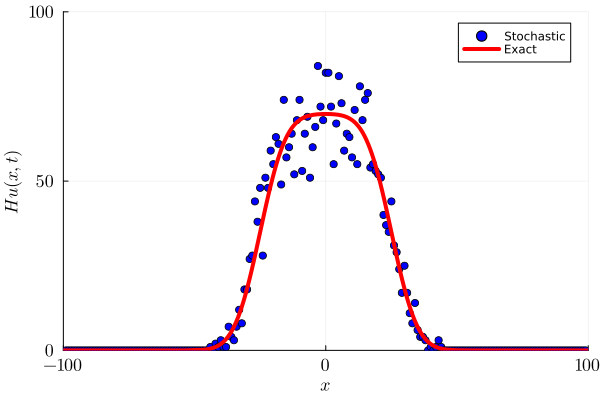

In [24]:
θG=[0.25,0.01,3.0]
lb=[0.1,0.0,0.01]
ub=[2.0,0.1,10.0]
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)
Dmle=xopt[1]
rmle=xopt[2]
σmle=xopt[3]
fmle=fopt
C(x)=LY*U0*exp(rmle*T)*(erf((h-x)/sqrt(4*Dmle*T))+erf((h+x)/sqrt(4*Dmle*T)))/2;
p1=scatter(xxloc,data,mc=:blue,msc=:match,label="Stochastic")
p1=plot!(C,-LX/2,LX/2,lw=4,lc=:red,label="Exact",xlabel=L"x",ylabel=L"H u(x,t)",xlims=(-100,100),ylims=(0,100))
p1=plot!(xticks = ([-100,0,100],  [ L"-100", L"0", L"100" ]))
p1=plot!(yticks = ([0,50,100],[L"0", L"50", L"100"]))
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(p1) #Computes the MLE and plots data and MLE solution as a visual check

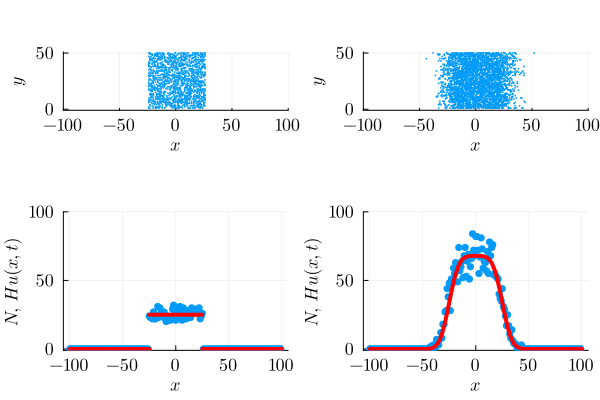

In [26]:
p1 = scatter(pos0[1:end],ms=1,msc=:auto)
p1 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p1=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p1=plot!(yticks=([0, 50],[L"0",L"50"]))
p1=plot!(xlabel=L"x",ylabel=L"y")
#display(p1)

p2 = scatter(pos[1:end],ms=1,msc=:auto)
p2 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p2=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p2=plot!(yticks=([0, 50],[L"0",L"50"]))
p2=plot!(xlabel=L"x",ylabel=L"y")
#display(p2)

p3 = scatter(xxloc,NumAgent0,label=false,msc=:auto)
f(x)=LY*U0;
g(x)=0.0;
p3=plot!(f,-h,h,lw=4,lc=:red,label=false)
p3=plot!(g,-LX/2,-h,lw=4,lc=:red,label=false)
p3=plot!(g,h,LX/2,lw=4,lc=:red,label=false)
p3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p3=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p3=plot!(yticks=([0, 50, 100],[L"0",  L"50", L"100"]))
p3=plot!(ylims=(-1,100))
p3=plot!(xlabel=L"x",ylabel=L"N, \, H u(x,t)")


p4 = scatter(xxloc,data,label=false,msc=:auto)
p4 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false)
p4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p4=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p4=plot!(yticks=([0, 50, 100],[L"0",  L"50", L"100"]))
p4=plot!(ylims=(-1,100))
p4=plot!(xlabel=L"x",ylabel=L"N, \, H u(x,t)")

p5=plot(p1,p2,p3,p4,layout=(2,2))
#savefig(p5,"dots.pdf") #Figure 8
display(p5)

In [54]:
xopt #Print out the MLE 

3-element Vector{Float64}:
 0.3030698604202326
 0.01028440240304114
 4.693677761728608

In [28]:
df=1
llstar=-quantile(Chisq(df),0.95)/2; #Compute the asymptotic threshold loglikelihood value

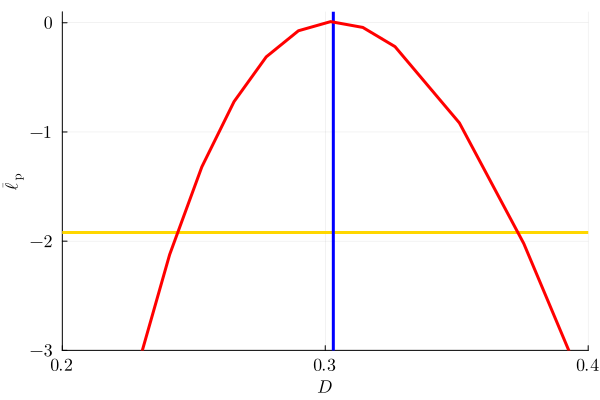

In [65]:
function univariateD(D) #Compute and plot univariate profile loglikelihood for D
    a=zeros(2)    
    function funD(a)
    return loglhood(data,[D,a[1],a[2]])
    end
    θG=[rmle,σmle]
    lb=[0.001,0.0] 
    ub=[0.02,10] 
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateD(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
Drange=LinRange(0.20,0.40,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1]
    #println(i)
end

q1=hline([llstar],legend=false,lw=3,color=:gold)
q1=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,Drange)
q1=plot!(Drange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q1=plot!(xticks=([0,0.1,0.2,0.3,0.4,0.5],[L"0",L"0.1", L"0.2", L"0.3",L"0.4", L"0.5"]))
q1=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q1)

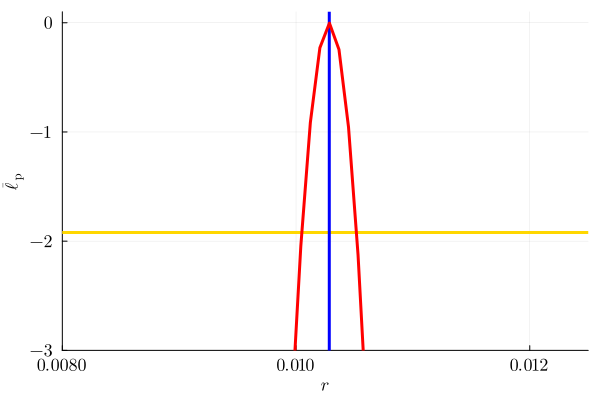

In [66]:
function univariater(r) #Compute and plot univariate profile loglikelihood for r
    a=zeros(2)    
    function funr(a)
    return loglhood(data,[a[1],r,a[2]])
    end
    θG=[Dmle,σmle]
    lb=[0.0,0.1] 
    ub=[1.0,10.0] 
    (xopt,fopt)=Optimise(funr,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariater(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
rrange=LinRange(0.008,0.012,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariater(rrange[i])[1]
  #  println(i)
end

q2=hline([llstar],legend=false,lw=3,color=:gold)
q2=vline!([rmle],legend=false,xlabel=L"r",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(rrange,ff.-maximum(ff),w=ones(length(rrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,rrange)
q2=plot!(rrange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(rrange[1],rrange[end]+0.0005))
q2=plot!(xticks=([0.0080,0.010,0.012],[L"0.0080",L"0.010",L"0.012"]))
q2=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q2)

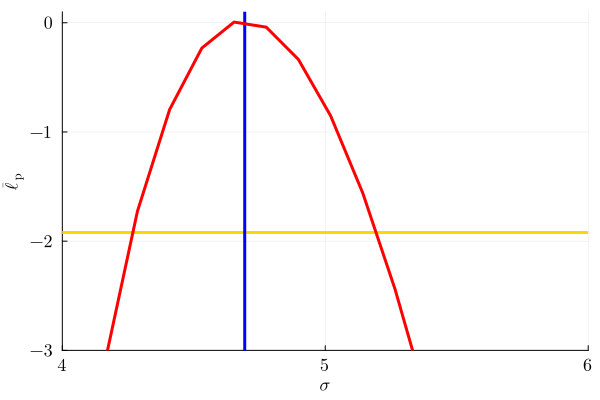

In [67]:
function univariateσ(σ) #Compute and plot univariate profile loglikelihood for \sigma
    a=zeros(2)    
    function funσ(a)
    return loglhood(data,[a[1],a[2],σ])
    end
    θG=[Dmle,rmle]
    lb=[0.0,0.0] 
    ub=[1.0,0.1] 
    (xopt,fopt)=Optimise(funσ,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateσ(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
σrange=LinRange(4.0,6.0,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateσ(σrange[i])[1]
  #  println(i)
end

q3=hline([llstar],legend=false,lw=3,color=:gold)
q3=vline!([σmle],legend=false,xlabel=L"σ",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(σrange,ff.-maximum(ff),w=ones(length(σrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,σrange)
q3=plot!(σrange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(σrange[1],σrange[end]))
q3=plot!(xticks=([4,5,6],[L"4",L"5",L"6"]))
q3=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q3)

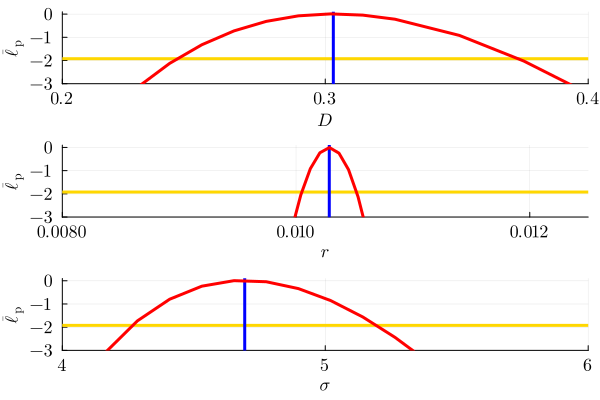

In [68]:
q4=plot(q1,q2,q3,layout=(3,1))
display(q4) #Figure 9(a)
#savefig(q4,"Profiles.pdf") 

In [70]:
fff(θ1,θ2,θ3) = funmle([θ1,θ2,θ3]) #Compute the observed Fisher Information at the MLE
H = -ForwardDiff.hessian(z -> fff(z[1],z[2],z[3]),xopt);
H = Symmetric(H) #Ensure the matrix is symmetric

3×3 Symmetric{Float64, Matrix{Float64}}:
 1217.73        -1.60794e5     3.62344e-6
   -1.60794e5    9.14536e7     0.000159458
    3.62344e-6   0.000159458  18.1566

In [71]:
Σ = inv(H);
mvnorm = MvNormal(xopt, Σ); #MVN distribution to invoke Laplace's approximation
M=1000
samples = rand(mvnorm, M); #Draw parameter samples

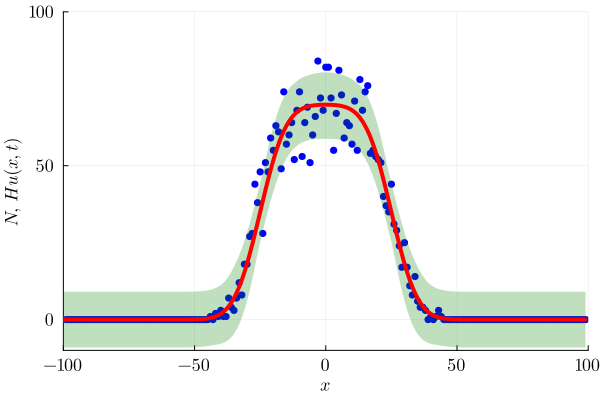

In [72]:
lowerG=20*LY*ones(length(xxloc))
upperG=zeros(length(xxloc))



for i in 1:M
#println(i)
C(x)=LY*U0*exp(samples[2,i]*T)*(erf((h-x)/sqrt(4*samples[1,i]*T))+erf((h+x)/sqrt(4*samples[1,i]*T)))/2;

   for j in 1:length(xxloc)
        if C(xxloc[j])+quantile(Normal(0,samples[3,i]),[0.05,0.95])[1] < lowerG[j] 
            lowerG[j] = C(xxloc[j])+quantile(Normal(0,samples[3,i]),[0.05,0.95])[1]
        end
       
        if C(xxloc[j])+quantile(Normal(0,samples[3,i]),[0.05,0.95])[2] > upperG[j] 
            upperG[j] = C(xxloc[j])+quantile(Normal(0,samples[3,i]),[0.05,0.95])[2] 
        end
       
    end

end

C(x)=LY*U0*exp(rmle*T)*(erf((h-x)/sqrt(4*Dmle*T))+erf((h+x)/sqrt(4*Dmle*T)))/2;
r2=scatter(xxloc,data,mc=:blue,msc=:auto,label=false)
r2=plot!(xxloc,lowerG,lw=0,fillrange=upperG,fillalpha=0.25,color=:green,label=false,xlims=(-100,100),ylims=(-10,100))
r2=plot!(C,xxloc[1],xxloc[end],lw=4,label=false,xlabel=L"x",ylabel=L"N, \, H u(x,t)",color=:red)
r2=plot!(xticks = ([-100,-50,0,50,100],  [L"-100", L"-50", L"0", L"50", L"100"]))
r2=plot!(yticks = ([0,50,100],[L"0", L"50", L"100"]))
r2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(r2) #Figutr 9(b)
#savefig(r2,"Predictions.pdf")